KDD - Titanic

Initial Data:
    survived   age     fare  pclass
0         0  22.0   7.2500       3
1         1  38.0  71.2833       1
2         1  26.0   7.9250       3
3         1  35.0  53.1000       1
4         0  35.0   8.0500       3

Missing Values:
 survived    0
age         0
fare        0
pclass      0
dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.75       114
           1       0.69      0.45      0.55        84

    accuracy                           0.68       198
   macro avg       0.68      0.65      0.65       198
weighted avg       0.68      0.68      0.67       198


Confusion Matrix:
 [[97 17]
 [46 38]]


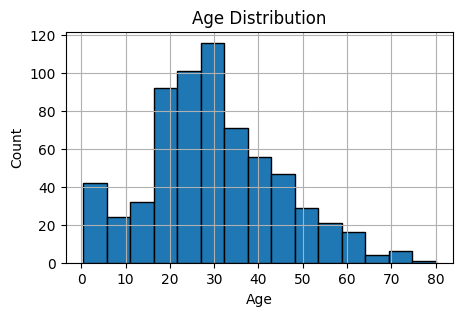

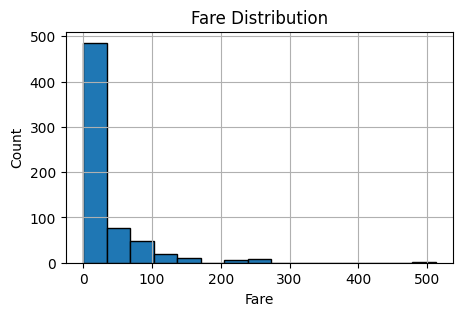

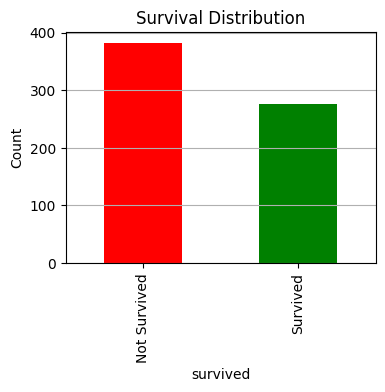


Prediction for new passenger: Not Survived


In [ ]:
# Step 1: Import Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# KDD STEP 1: DATA SELECTION
# -----------------------------
df = sns.load_dataset("titanic")[["survived", "age", "fare", "pclass"]]
print("Initial Data:\n", df.head())

# -----------------------------
# KDD STEP 2: DATA CLEANING
# -----------------------------
df = df.dropna()                 # remove missing values
df = df.drop_duplicates()        # remove duplicates

print("\nMissing Values:\n", df.isnull().sum())

# -----------------------------
# KDD STEP 3: DATA TRANSFORMATION
# -----------------------------
X = df[["age", "fare", "pclass"]]
y = df["survived"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# KDD STEP 4: DATA MINING / MODELING
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -----------------------------
# KDD STEP 5: PATTERN EVALUATION
# -----------------------------
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# KDD STEP 6: KNOWLEDGE PRESENTATION (GRAPHS)
# -----------------------------

# 1. Age Distribution
plt.figure(figsize=(5, 3))
plt.hist(df["age"], bins=15, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 2. Fare Distribution
plt.figure(figsize=(5, 3))
plt.hist(df["fare"], bins=15, edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 3. Survival Count
plt.figure(figsize=(4, 3))
df["survived"].value_counts().plot(kind="bar", color=['red', 'green'])
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.title("Survival Distribution")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# -----------------------------
# Prediction for a new passenger
# -----------------------------
new_passenger = pd.DataFrame({
    "age": [30],
    "fare": [60],
    "pclass": [2]
})

new_scaled = scaler.transform(new_passenger)
pred = model.predict(new_scaled)[0]

print("\nPrediction for new passenger:",
      "Survived" if pred == 1 else "Not Survived")


KDD-Breast Cancer

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

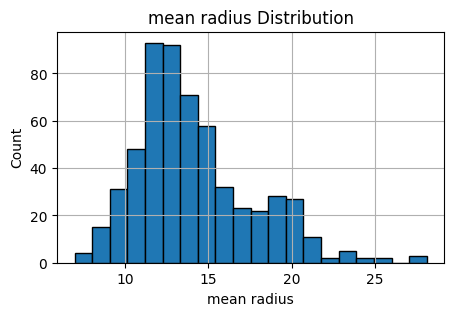

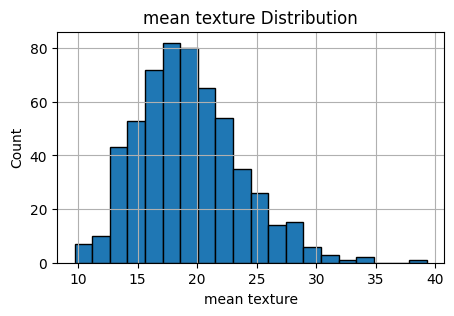

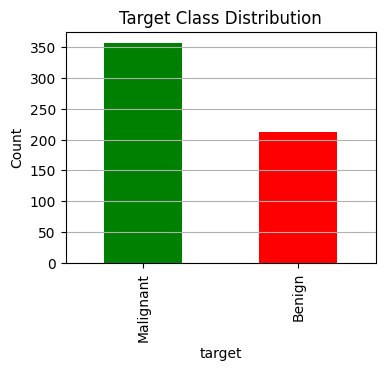


Prediction for sample: Malignant


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
print(df.head())

# Step 3: Preprocessing
X = df.iloc[:, :-1]
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 5: Logistic Regression Model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Visualizations
# 1. Histogram of two important features
for col in ["mean radius", "mean texture"]:
    plt.figure(figsize=(5, 3))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

# 2. Target balance
plt.figure(figsize=(4, 3))
df["target"].value_counts().plot(kind="bar", color=['green', 'red'])
plt.xticks([0, 1], ["Malignant", "Benign"])
plt.title("Target Class Distribution")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# Step 8: Predict a New Sample
new_sample = pd.DataFrame([df.iloc[0, :-1]])  # use first row structure
new_scaled = scaler.transform(new_sample)
pred = model.predict(new_scaled)[0]
print("\nPrediction for sample:", "Benign" if pred == 1 else "Malignant")
